# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy.core as owm


# Import API key
from api_keys_protected import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Put cities in a dataframe

#Create dataframe to hold city information


cities_data = pd.DataFrame(cities)

cities_data = cities_data.rename(columns={0:"City"})
cities_data["Temperature"] = ""
cities_data["Lat"] = ""
cities_data["Lon"] = ""
cities_data["Humidity"] = ""
cities_data["Cloudiness"] = ""
cities_data["Wind Speed"] = ""


cities_data.head()


,City,Temperature,Lat,Lon,Humidity,Cloudiness,Wind Speed
0,puerto ayora,,,,,,
1,mitu,,,,,,
2,kavieng,,,,,,
3,albany,,,,,,
4,lebanon,,,,,,


In [4]:
units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"



query_url = f"{base_url}appid={api_key}&units={units}&q="

lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
cities = []
dates = []
countries = []



for index, row in cities_data.iterrows():
   
     
    city = row["City"]
   
    
    
    
    final_query_url = query_url+city
    
  
    
    response = requests.get(final_query_url).json()
    
    
   
    
   
    
    
    
    try: 
        #print(f"Retrieving Results for Index {index}: {city}.")
        #print(final_query_url)
        cities.append(response['name'])
        dates.append(response['dt'])
        countries.append(response['sys']['country'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
    
    except (KeyError, IndexError):
        print("Missing field/result...skipping.")
    
  

    
 
  

    

Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing field/result...skipping.
Missing fi

In [5]:
print(f"Cities count {len(cities)}")
print(f"Countries count {len(countries)}")
print(f"Date count {len(dates)}")
print(f"Lat count {len(lat)}")
print(f"Lon count {len(lon)}")
print(f"Max Temp count {len(temp_max)}")
print(f"Humidity count {len(humidity)}")
print(f"Clouds count {len(clouds)}")
print(f"Wind_speed count {len(wind_speed)}")

Cities count 562
Countries count 562
Date count 562
Lat count 562
Lon count 562
Max Temp count 562
Humidity count 562
Clouds count 562
Wind_speed count 562


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create a weather dictionary

weather_dict = {
    "City": cities,
    "Country": countries,
    "Date": dates,
    "Lat": lat,
    "Lon":lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,1540137600,-0.74,-90.35,78.80,65,75,20.80
1,Mitu,IR,1540142150,36.20,46.09,47.32,86,48,2.62
2,Kavieng,PG,1540142150,-2.57,150.80,82.11,100,68,4.29
3,Albany,US,1540140840,42.65,-73.75,42.80,41,75,17.22
4,Lebanon,US,1540141440,43.64,-72.25,39.20,48,90,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

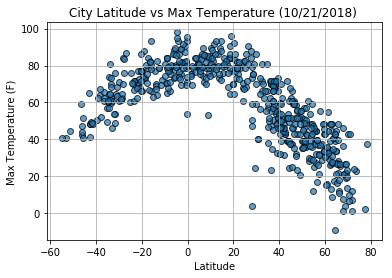

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", alpha =.7, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (10/21/2018) ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

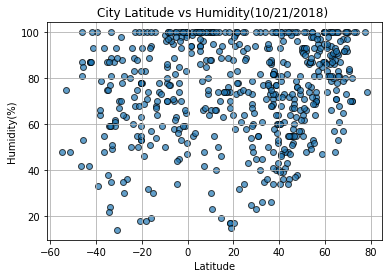

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", alpha =.7, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(10/21/2018) ")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

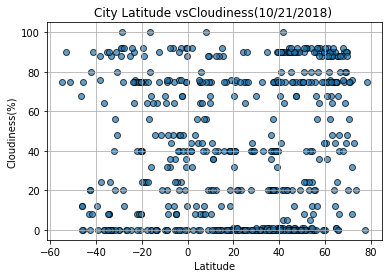

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", alpha =.7, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vsCloudiness(10/21/2018) ")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

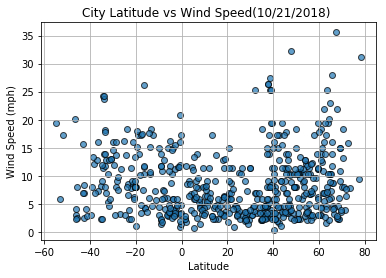

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", alpha =.7, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(10/21/2018) ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsWindSpeed.png")

# Show plot
plt.show()